In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


#**Basic Information of Dataset**

In [8]:
print("Shape of train dataset:",train_df.shape)
print("Shape of test dataset:",test_df.shape)

Shape of train dataset: (15533, 18)
Shape of test dataset: (5225, 17)


In [21]:
train_df.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight


In [22]:
test_df.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,15533,Female,19.007177,1.772449,137.852618,yes,yes,3.0,3.000000,Sometimes,no,2.007348,no,1.465931,0.813235,Sometimes,Public_Transportation
1,15534,Female,21.572114,1.698346,75.000000,yes,yes,2.0,3.000000,Sometimes,no,2.000000,no,1.577824,1.865851,Sometimes,Public_Transportation
2,15535,Male,22.285024,1.737453,82.000000,yes,yes,2.0,2.720642,Sometimes,no,1.830614,no,0.451009,0.000000,Sometimes,Public_Transportation


In [19]:

print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                             

In [10]:
print("\n--- Missing Values ---")
print(train_df.isnull().sum())


--- Missing Values ---
id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
WeightCategory                    0
dtype: int64


In [11]:
print("\n--- Descriptive Statistics ---")
print(train_df.describe())


--- Descriptive Statistics ---
                 id           Age        Height        Weight          FCVC  \
count  15533.000000  15533.000000  15533.000000  15533.000000  15533.000000   
mean    7766.000000     23.816308      1.699918     87.785225      2.442917   
std     4484.135201      5.663167      0.087670     26.369144      0.530895   
min        0.000000     14.000000      1.450000     39.000000      1.000000   
25%     3883.000000     20.000000      1.630927     66.000000      2.000000   
50%     7766.000000     22.771612      1.700000     84.000000      2.342220   
75%    11649.000000     26.000000      1.762921    111.600553      3.000000   
max    15532.000000     61.000000      1.975663    165.057269      3.000000   

                NCP          CH2O           FAF           TUE  
count  15533.000000  15533.000000  15533.000000  15533.000000  
mean       2.760425      2.027626      0.976968      0.613813  
std        0.706463      0.607733      0.836841      0.602223  


# **Target Variable Distribution**

/tmp/ipython-input-76876014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='WeightCategory', data=train_df, palette='coolwarm')


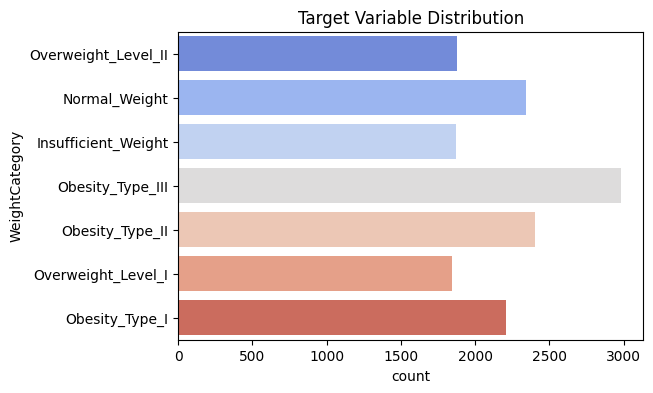

In [13]:

plt.figure(figsize=(6,4))
sns.countplot(y='WeightCategory', data=train_df, palette='coolwarm')
plt.title("Target Variable Distribution")
plt.show()

# ***Univariant Analysis***

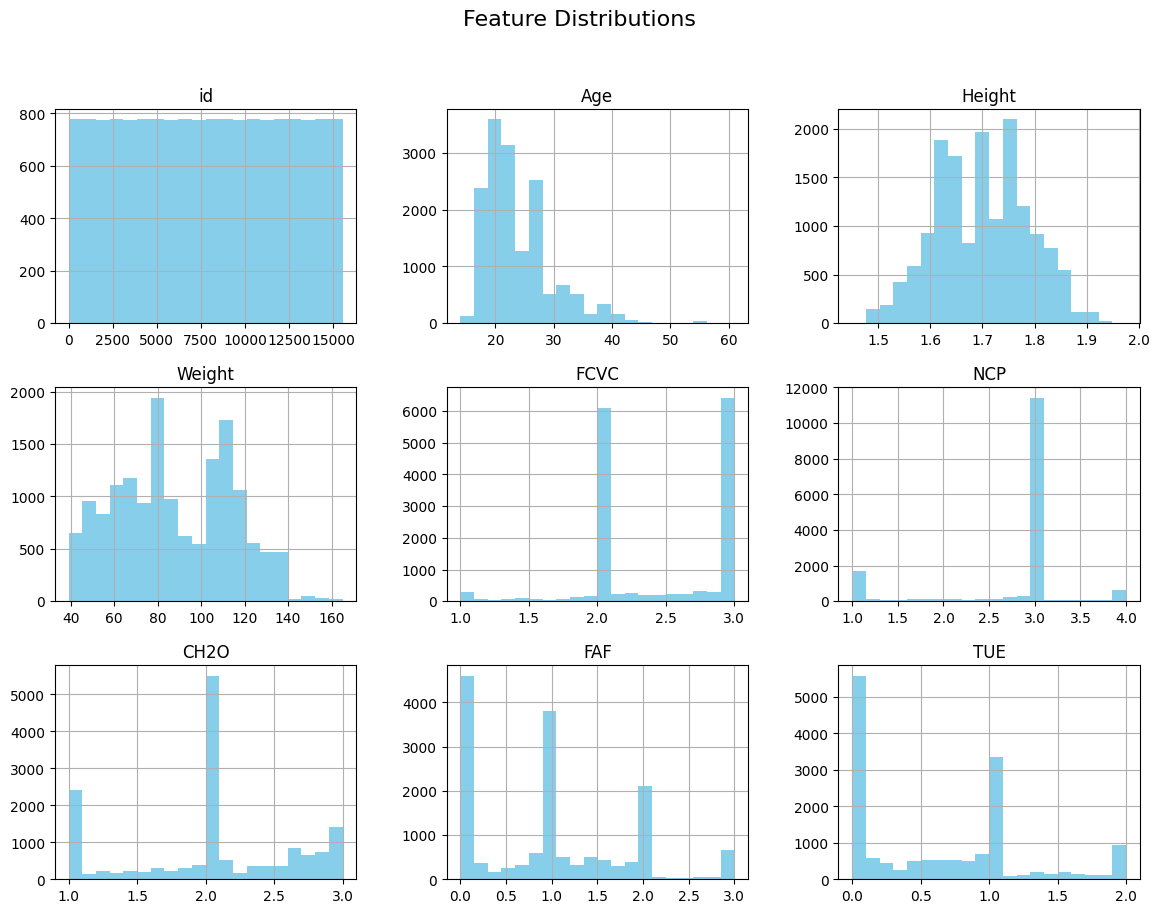

In [18]:

num_cols = train_df.select_dtypes(include=['int64','float64']).columns
train_df[num_cols].hist(bins=20, figsize=(14,10), color='skyblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# **Correlation heatmap**

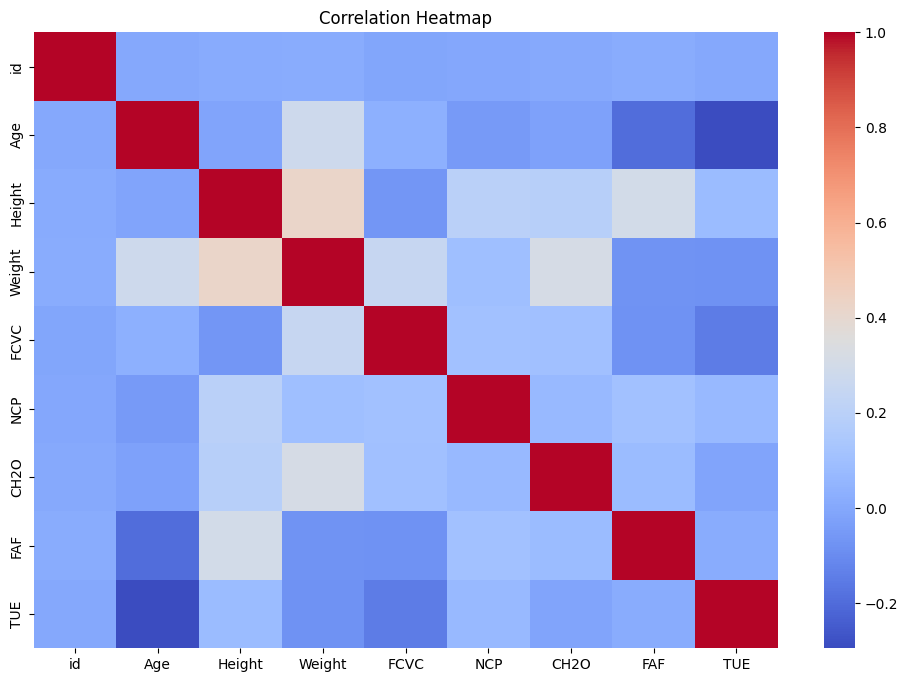

In [17]:
# ----- Correlation heatmap -----
plt.figure(figsize=(12,8))
# FIX: Added numeric_only=True to ignore string columns
sns.heatmap(train_df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Handling Categorical Data**

In [23]:
label_encoders = {}
for col in train_df.select_dtypes(include=['object']).columns:
    if col == 'WeightCategory':
        continue  # don't encode target here
    le = LabelEncoder()
    combined = pd.concat([train_df[col], test_df[col]], axis=0).astype(str)
    le.fit(combined)
    train_df[col] = le.transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))
    label_encoders[col] = le

In [24]:
target_encoder = LabelEncoder()
train_df['WeightCategory'] = target_encoder.fit_transform(train_df['WeightCategory'])

# **Train Test Split**

In [25]:
X = train_df.drop(columns=['WeightCategory'])
y = train_df['WeightCategory']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# **Training Model**

In [26]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Prediction and Accuracy**

In [28]:
from sklearn.metrics import accuracy_score
val_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, val_pred)
print(f"\n Validation Accuracy: {val_acc * 100:.2f}%")


 Validation Accuracy: 89.80%


# **Confusion Matrix**

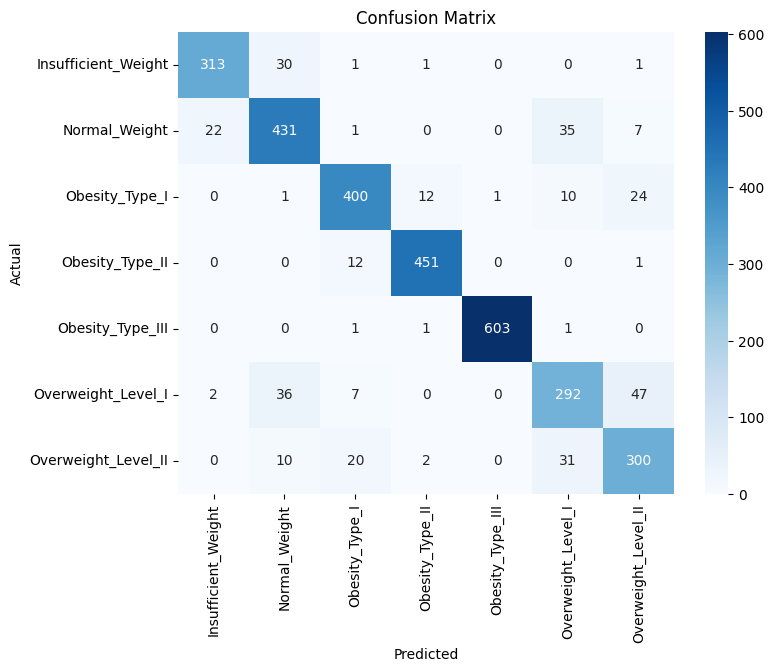

In [29]:
conf_matrix = confusion_matrix(y_val, val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Important Features**

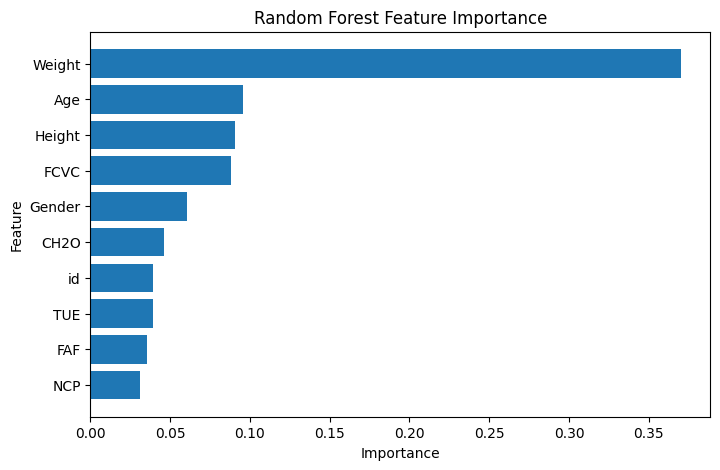

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# **Model Prediction on test Dataset**

In [31]:
test_pred = model.predict(test_df)

In [32]:
test_pred_labels = target_encoder.inverse_transform(test_pred)

In [33]:
output = pd.DataFrame({
    'id': test_df['id'],
    'Predicted_WeightCategory': test_pred_labels
})
output.to_csv('predictions.csv', index=False)

print("\n Predictions saved to predictions.csv")


 Predictions saved to predictions.csv


In [34]:
from google.colab import files
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>